# Exercise 3 Quantitative Measures from ERP signals 

### Exercises 3 and 4 completes our discussion of extracting features from EEG experiments for building relationships with data. 

#### Exercise 3 is focused on extracting ERP measures (peak amplitude and latency) from ERP averages.  

### We will come back to these EEG measurements when we learn about classifiers.

## Face Perception Experiment 

### These data were extracted from the ERP CORE (https://osf.io/thsqg/wiki/home/).  

### These are data from the experiment, **N170 Face Perception Experiment**

### Some details of the experiment - 
*   The stimulus consists of four types of stimuli - Faces. Cars. Scrambled Faces, Scrambled Cars
*   On any trial one of these stimuli are presented (with probability 0.25)
*   On each trial, an image of a face, car, scrambled face, or scrambled car was presented in the center of the screen, and participants indicated whether a given stimulus was an “object” (face or car) or a “texture” (scrambled face or scrambled car)

## THIS IS ONE OF THE STIMULUS SETS FOR THE CLASS FINAL PROJECT.  IN THE FINAL PROJECT, THE TASK WILL BE TO CHARACTERIZE THE DIFFERENCES BETWEEN THE 4 STIMULUS CLASSES AND DEVELOP A CLASSIFIER MODEL TO PREDICT WHICH STIMULUS WAS PRESENTED ON EACH TRIAL. 


In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from hdf5storage import loadmat, savemat 
from scipy.fftpack import fft
from scipy import signal  #THIS IS NEW!!!

#### There are 3 data files available for your inspection, 1_N170.mat, 2_N170.mat, 3_N170.mat 
#### The 3 files have the same experiment in different participants.  

In [2]:
data = loadmat('data/2_N170.mat')


In [3]:
channelnames = data['channelnames']
eeg = data['eeg']
eeg = eeg*10**6 #converting to microvoltz
eeg_time = data['eeg_time']
goodtrials = data['goodtrials']
nchannels = data['nchannels']
ntrials = data['ntrials']
response = data['response']
responsetime = data['responsetime']
samplingrate = data['samplingrate']
stimulus = data['stimulus']

# README 

### The information about the datafiles in an experiment is normally placed in a README file. 
### For convenience I am going to place that information here instead.

###  This data was obtained from the archive ERP CORE and reorganized for this class. 
###  Each file contains the data of one participant, indicated in the filename. 
###  The variables contained here are 

*   `ntrials` - number of trials in the experiment 
*   `nchannels` - number of EEG channels 
*   `samplingrate` - number of samples of EEG in per second
*   `eeg` - eegdata of the experiment.  of dimensions, ntrials x nchannels x ntimepoints.  The EEG is provided in units of volts. 
*   `eeg_time` - the time relative to *stimulus onset* in each EEG observation.
*   `channelnames` - the name of the EEG channels indicating where it is located.    
*   `stimulus` - the stimulus presented on each good trial, 1 = face, 2 = car, 3 = scrambled face, 4 = scrambled car 
*   `response` - variable indicating the response accuracy 1 = correct, -1 = incorrect, 0 = no response,
*   `responsetime` - time after stimulus onset when the subject provided a response. 
*   `goodtrials` - vector with value 1 if the trial had a response, 0 if no response or multiple responses.   

## Problem 1 

#### Compute the Event-related potential (ERP) separately for each stimulus type. 
#### Plot the data at electrodes corresponding to P3,Pz,P4 over parietal cortex, and PO7, O1,O2,PO8 over the occipital cortex.   
#### Apply filters and extract the P300/CPP amplitude and latency at electrode Pz. 
#### Apply filters and extract the N170 amplitude and latency at one of PO7,PO8 for the face and car stimuli.  Select the electrode that has the clearest N170 for all 3 participants data.   Alternatively, you could collapse the 2 electrodes data by averaging them together.   
#### For the scrambled face and scrambled car stimuli, use the latency of the face and car stimuli, and extract the voltage of the corresponding scrambled stimulus response.  
####
#### **Your notebook should run cleanly.  That is, I should be able to change with data file is being run, and it should be able to run and make all of the above plots and quantitative estimates.**  



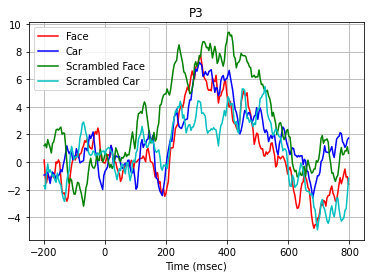

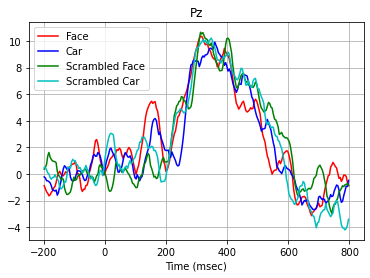

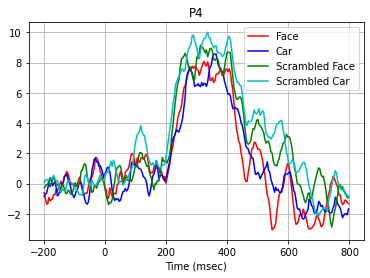

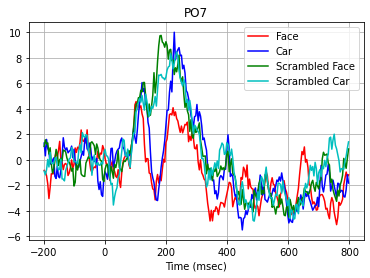

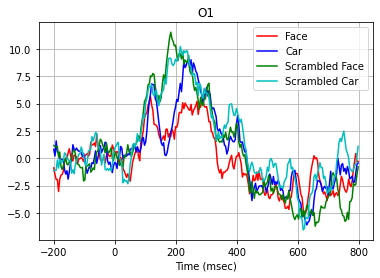

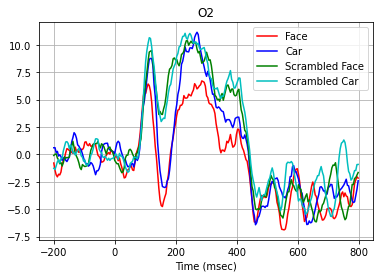

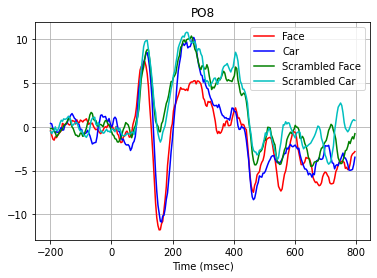

In [4]:
#computing ERP for each stimulus type
erp_face = np.mean(eeg[(goodtrials == 1)&(stimulus == 1),:,:],axis =0)
erp_car = np.mean(eeg[(goodtrials == 1)&(stimulus == 2),:,:],axis =0)
erp_scramface = np.mean(eeg[(goodtrials == 1)&(stimulus == 3),:,:],axis =0)
erp_scramcar = np.mean(eeg[(goodtrials == 1)&(stimulus == 4),:,:],axis =0)

#plotting 
#P3 = 6, PZ = 12, P4 = 23, PO7 = 8, O1 = 10, O2 = 27, PO8 = 25
for i in (6, 12, 23, 8, 10, 27, 25):
    plt.plot(eeg_time, erp_face[i,:],'r')
    plt.plot(eeg_time, erp_car[i,:],'b')
    plt.plot(eeg_time, erp_scramface[i,:],'g')
    plt.plot(eeg_time, erp_scramcar[i,:],'c')
    plt.title(channelnames[i])
    plt.xlabel('Time (msec)')
    plt.grid()
    plt.legend(('Face','Car','Scrambled Face','Scrambled Car'))
    plt.show()  



### Filtering for P300/CPP for Pz

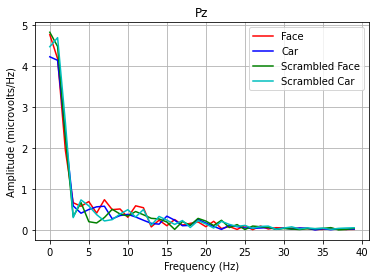

In [5]:
#Amplitude Spectrum
T = 1  #duration of the time series 
deltaf = 1/T # frequency resolution 
nsamp = np.shape(erp_face)[1] #number of samples 
nf = int(nsamp/2) #highest frequency is 1/2 
f = np.arange(0,nf)*deltaf #steps in frequency 
fft_erp_face = fft(erp_face, axis = 1)
amplitude_face = 2*np.abs(fft_erp_face)/nsamp/deltaf
fft_erp_car = fft(erp_car, axis = 1)
amplitude_car = 2*np.abs(fft_erp_car)/nsamp/deltaf
fft_erp_scramface = fft(erp_scramface, axis = 1)
amplitude_scramface = 2*np.abs(fft_erp_scramface)/nsamp/deltaf
fft_erp_scramcar = fft(erp_scramcar, axis = 1)
amplitude_scramcar = 2*np.abs(fft_erp_scramcar)/nsamp/deltaf

maxf = 40
maxbin = int(maxf/deltaf)
plt.figure()
plt.plot(f[range(maxbin)],amplitude_face[12,range(maxbin)],'r-')
plt.plot(f[range(maxbin)],amplitude_car[12,range(maxbin)],'b-')
plt.plot(f[range(maxbin)],amplitude_scramface[12,range(maxbin)],'g-')
plt.plot(f[range(maxbin)],amplitude_scramcar[12,range(maxbin)],'c-')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.title(channelnames[12])
plt.legend(('Face','Car','Scrambled Face','Scrambled Car'))
plt.show()

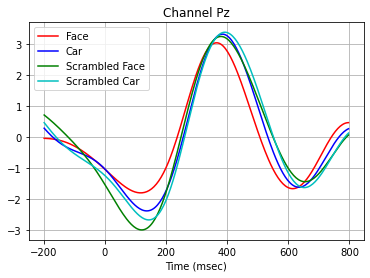

In [6]:
#Making a filter
from eeg import makefilter,bodeplot

#lowpass filter
bl,al,w,h = makefilter(256,3,7)

erpfilt_face = signal.filtfilt(bl,al,erp_face,axis=1)  
erpfilt_car = signal.filtfilt(bl,al,erp_car,axis=1)
erpfilt_scramface = signal.filtfilt(bl,al,erp_scramface,axis=1)  
erpfilt_scramcar = signal.filtfilt(bl,al,erp_scramcar,axis=1)

bh,ah,w,h, = makefilter(256,1,0.5)

erpfilt_face = signal.filtfilt(bh,ah,erpfilt_face,axis=1)  
erpfilt_car = signal.filtfilt(bh,ah,erpfilt_car,axis=1)
erpfilt_scramface = signal.filtfilt(bh,ah,erpfilt_scramface,axis=1)  
erpfilt_scramcar = signal.filtfilt(bh,ah,erpfilt_scramcar,axis=1)

plt.plot(eeg_time,erpfilt_face[12,:],'r')
plt.plot(eeg_time,erpfilt_car[12,:],'b')
plt.plot(eeg_time,erpfilt_scramface[12,:],'g')
plt.plot(eeg_time,erpfilt_scramcar[12,:],'c')
plt.title('Channel '+channelnames[12])
plt.xlabel('Time (msec)')
plt.grid()
plt.legend(('Face','Car','Scrambled Face','Scrambled Car'))
plt.show()

In [7]:
#Extracting Amplitude & Latency
max_face = np.max(erpfilt_face[12,:])   
max_index_face = np.argmax(erpfilt_face[12,:]) 
max_time_face = eeg_time[max_index_face] 
max_car = np.max(erpfilt_car[12,:])
max_index_car = np.argmax(erpfilt_car[12,:])
max_time_car = eeg_time[max_index_car]
max_scramface = np.max(erpfilt_scramface[12,:])  
max_index_scramface = np.argmax(erpfilt_scramface[12,:]) 
max_time_scramface = eeg_time[max_index_scramface] 
max_scramcar = np.max(erpfilt_scramcar[12,:])
max_index_scramcar = np.argmax(erpfilt_scramcar[12,:])
max_time_scramcar = eeg_time[max_index_scramcar]


### N170 for PO7 and PO8

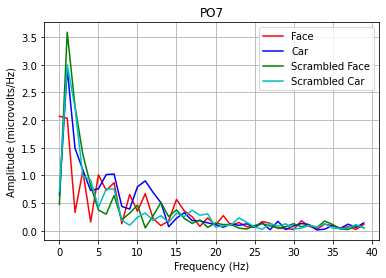

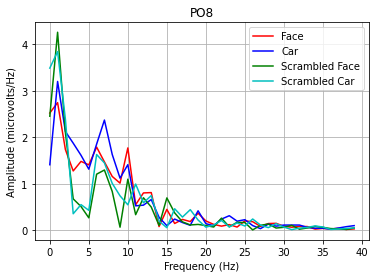

In [8]:
#Amplitude
maxf = 40
maxbin = int(maxf/deltaf)
for j in (8,25):
    plt.figure()
    plt.plot(f[range(maxbin)],amplitude_face[j,range(maxbin)],'r-')
    plt.plot(f[range(maxbin)],amplitude_car[j,range(maxbin)],'b-')
    plt.plot(f[range(maxbin)],amplitude_scramface[j,range(maxbin)],'g-')
    plt.plot(f[range(maxbin)],amplitude_scramcar[j,range(maxbin)],'c-')
    plt.grid()
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude (microvolts/Hz)')
    plt.title(channelnames[j])
    plt.legend(('Face','Car','Scrambled Face','Scrambled Car'))
    plt.show()

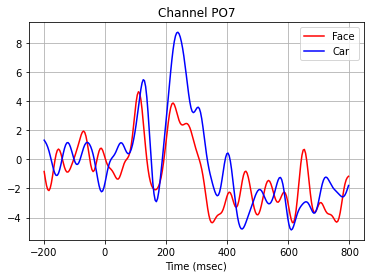

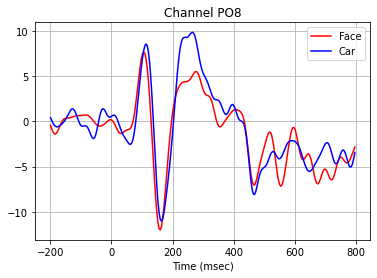

In [9]:
#Creating a lowpass filter to cut off at 20 Hz
blow,alow,w,h = makefilter(256,25,30) #lowpass filter with the a cutoff of 20 Hz and stop at 25 Hz 
erpfilt_face = signal.filtfilt(blow,alow,erp_face,axis=1)
erpfilt_car = signal.filtfilt(blow,alow,erp_car,axis=1)

chans = [8,25]
for j in range(2):
    plt.figure()
    plt.plot(eeg_time,erpfilt_face[chans[j],:],'r-')
    plt.plot(eeg_time,erpfilt_car[chans[j],:],'b-')
    plt.title('Channel '+channelnames[chans[j]])
    plt.xlabel('Time (msec)')
    plt.grid()
    plt.legend(('Face','Car'))

plt.show()

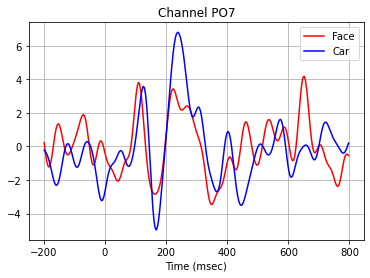

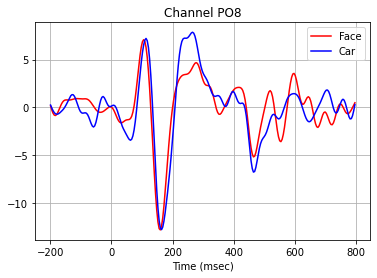

In [10]:
#Creating a highpass filter to cut off below 1 Hz
bhigh,ahigh,w,h = makefilter(256,1.5,0.5)
erpfilt_face = signal.filtfilt(bhigh,ahigh,erpfilt_face,axis=1)
erpfilt_car = signal.filtfilt(bhigh,ahigh,erpfilt_car,axis=1)

chans = [8,25]
for j in range(2):
    plt.figure()
    plt.plot(eeg_time,erpfilt_face[chans[j],:],'r-')
    plt.plot(eeg_time,erpfilt_car[chans[j],:],'b-')
    plt.title('Channel '+channelnames[chans[j]])
    plt.xlabel('Time (msec)')
    plt.grid()
    plt.legend(('Face','Car'))

plt.show()

In [11]:
#Extracting Latency for Face and Car stimulus in PO8 (Channel 25)

maxbin = 100
min_face = np.min(erpfilt_face[25,range(maxbin)])  #here i find the minimumvoltage 
min_index_face = np.argmin(erpfilt_face[25,range(maxbin)]) #here I find the latency of the maximum voltage in terms of the index 
min_time_face = eeg_time[min_index_face]
min_car = np.min(erpfilt_car[25,range(maxbin)])
min_index_car = np.argmin(erpfilt_car[25,range(maxbin)])
min_time_car = eeg_time[min_index_car]

#Extracting Voltage for Scrambled Face and Scrambled Car in PO8 (Channel 25)
min_scramface = erpfilt_scramface[25,92]
min_scramcar = erpfilt_scramcar[25,93]